In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
match_file = "/content/gdrive/My Drive/ML_project/Matches_clean.csv"
data = pd.read_csv(match_file)
data.columns
# data.describe()

Index(['Unnamed: 0', 'id', 'city', 'date', 'player_of_match', 'venue',
       'neutral_venue', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'winner', 'result', 'result_margin', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
# deccan chargers converted to srh
ActualNames = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 'Rising Pune Supergiant', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

ChangedNames = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']
data.replace(ActualNames, ChangedNames, inplace = True)

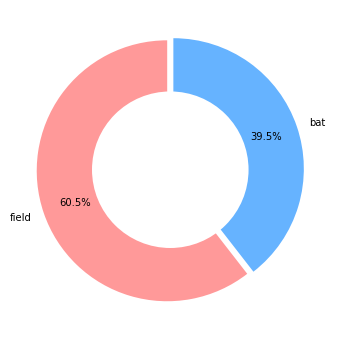

In [ ]:
# toss decision percentage
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
sizes = data.toss_decision.value_counts()
labels = data.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         explode = (0.025,0.025))

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

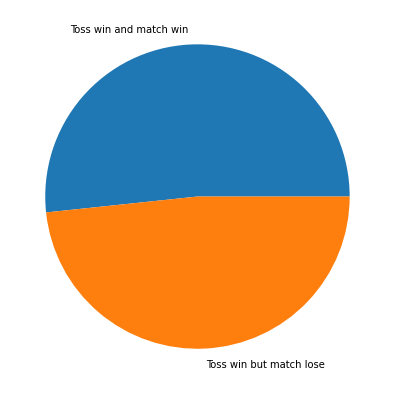

In [ ]:
bat_field_perc = pd.DataFrame([],columns =['Team','Bat First Win perc', 'Field First Win perc'])

toss_win_and_match_win = data[(data['toss_winner'] == data['winner'])].shape[0]
toss_win_and_match_lose = (data[(data['toss_winner'] != data['winner'])]).shape[0]

graph_labels = ['Toss win and match win', 'Toss win but match lose']

fig = plt.figure(figsize =(10, 7))
plt.pie([toss_win_and_match_win, toss_win_and_match_lose], labels=graph_labels)

plt.show()  

In [ ]:
# teams = (data['team1'].extend(data['team2'])).unique()

win_analysis = pd.DataFrame([],columns =['Team','Decision', 'Toss Win Count', 'Match Win Count', 'Total Matches'])
win_perc = pd.DataFrame([],columns =['Team','Bat win percentage', 'Field win percentage'])

for id, element in enumerate(ChangedNames):
    bat_decision = data[(data['toss_winner']== element) & (data['toss_decision']== 'bat')]
    field_decision = data[(data['toss_winner']== element) & (data['toss_decision']=='field')]
    bat_win = data[(data['toss_winner']== element) & (data['winner']==element) & (data['toss_decision']== 'bat')]
    field_win = data[(data['toss_winner']== element) & (data['winner']==element) & (data['toss_decision']== 'field')]
    total = data[(data['team1']== element) | (data['team2']== element)]
    
    bat_win_count = bat_win['winner'].count()
    bat_decision_count = bat_decision['toss_winner'].count()
    field_win_count = field_win['winner'].count()
    field_decision_count = field_decision['toss_winner'].count()
    
    win_analysis = win_analysis.append({'Team': element, 'Decision':'bat', 
                                              'Toss Win Count' : bat_decision_count, 'Match Win Count': bat_win_count, 'Total Matches': total.shape[0]},ignore_index= True)
    
    win_analysis = win_analysis.append({'Team': element, 'Decision':'field', 
                                              'Toss Win Count' : field_win_count, 'Match Win Count': field_decision_count, 'Total Matches': total.shape[0]},ignore_index= True)
    
    bat_win_perc = bat_win_count / bat_decision_count * 100 if bat_decision_count > 0 else 0
    field_win_perc = field_decision_count / field_win_count * 100 if field_win_count > 0 else 0
    win_perc = win_perc.append({
        'Team': element,
        'Bat win percentage': bat_win_perc,
        'Field win percentage': field_win_perc
    }, ignore_index= True)
    

In [ ]:
# win_analysis
win_perc

,Team,Bat win percentage,Field win percentage
0,SRH,44.680851,192.307692
1,MI,56.521739,167.647059
2,GL,0.000000,140.000000
3,RPS,0.000000,133.333333
4,RCB,47.826087,200.000000
5,KKR,51.515152,166.666667
6,DC,41.176471,210.344828
7,KXIP,22.222222,192.857143
8,CSK,61.224490,150.000000
9,RR,42.424242,172.413793


In [ ]:
import plotly.graph_objs as go
trace1 = go.Bar(x = win_perc.Team, y = win_perc['Bat win percentage'], name = "Bat win percentage", marker = dict(color = 'blue'), opacity = 0.6)
trace2 = go.Bar(x = win_perc.Team, y = win_perc['Field win percentage'], name = "Field win percentage", marker = dict(color = 'red'), opacity = 0.6)

layoutWinPer = go.Layout(title = 'Bat and Field win percentage', xaxis = dict(title = 'Team'), yaxis = dict(title = 'Percentage'), bargap = 0.2, bargroupgap = 0.05, plot_bgcolor='rgb(245,245,245)')

figureWinPer = go.Figure(data = [trace1, trace2], layout = layoutWinPer)
figureWinPer.show(renderer = "colab")

In [ ]:
## TODO
city_data = data.filter(['winner','city'], axis=1)
city_data['count'] = 1
city_data = city_data.groupby(by=["winner", "city"]).sum().reset_index()
# city_data.reset_index(inplace = True)
city_data

,winner,city,count
0,CSK,Abu Dhabi,3
1,CSK,Bangalore,4
2,CSK,Bengaluru,1
3,CSK,Centurion,1
4,CSK,Chandigarh,3
...,...,...,...
199,SRH,Raipur,1
200,SRH,Rajkot,1
201,SRH,Ranchi,1
202,SRH,Sharjah,2


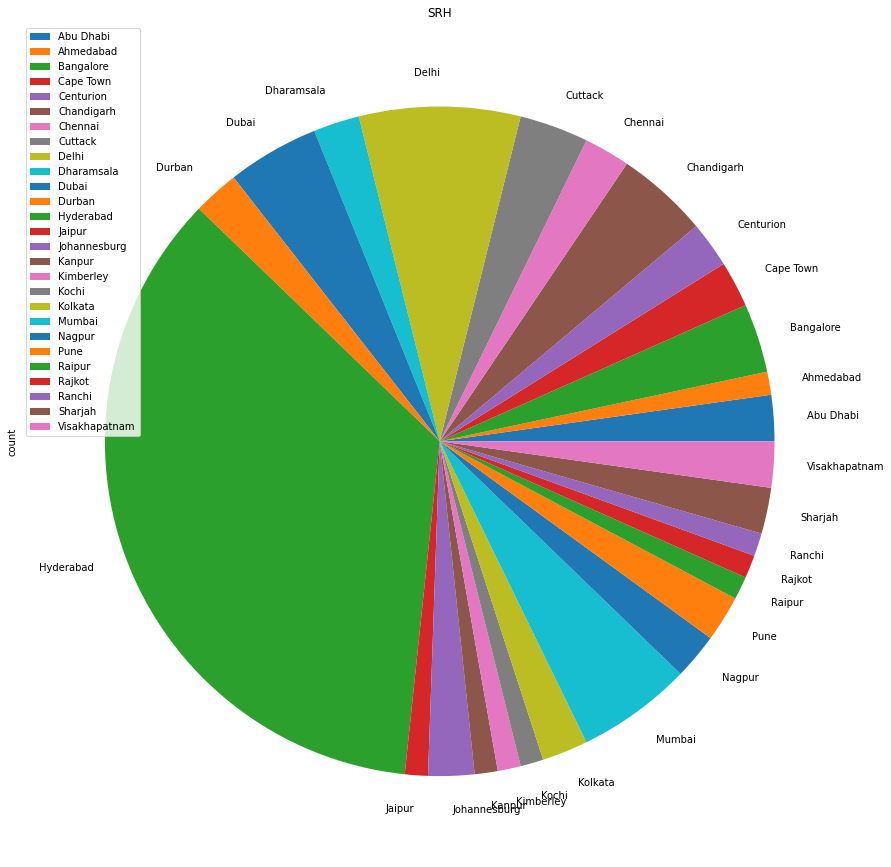

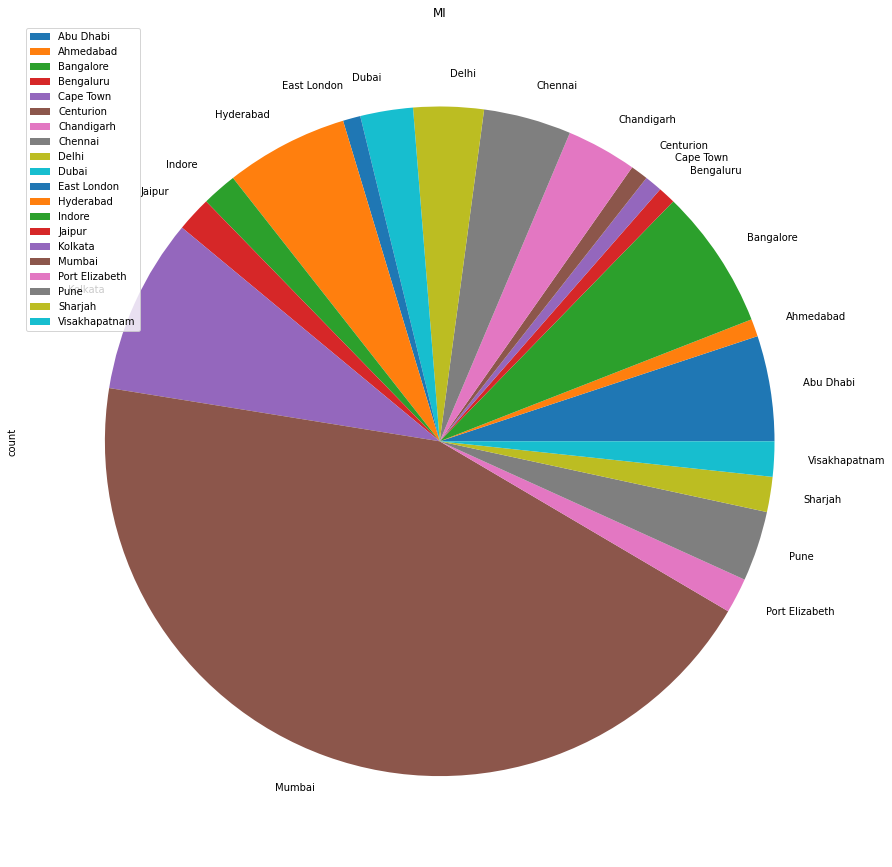

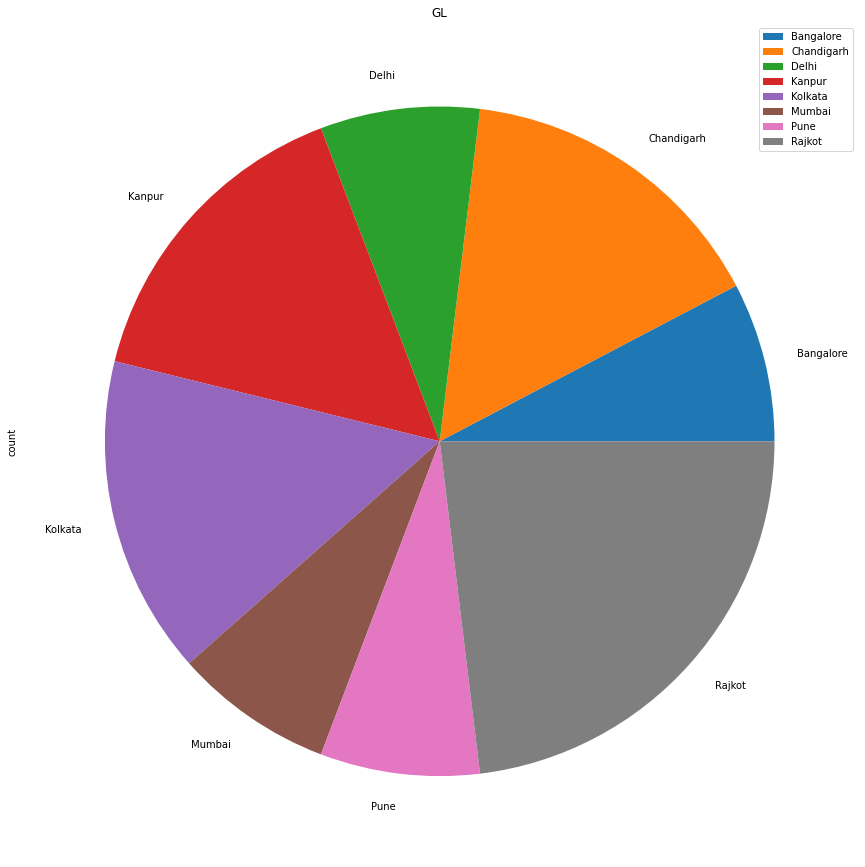

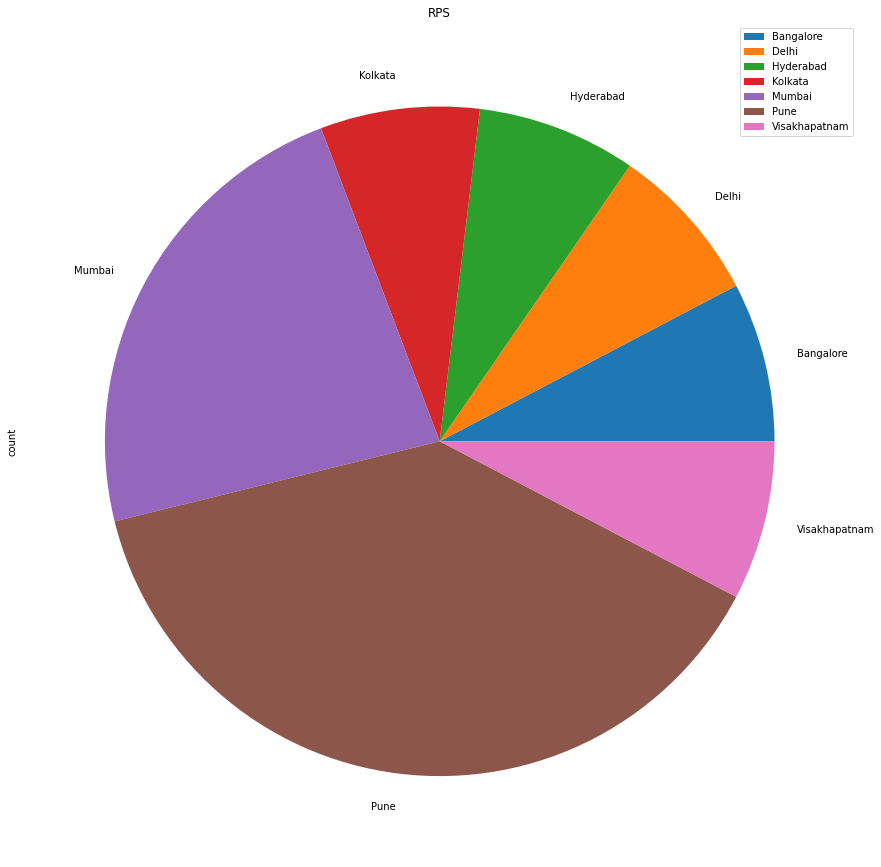

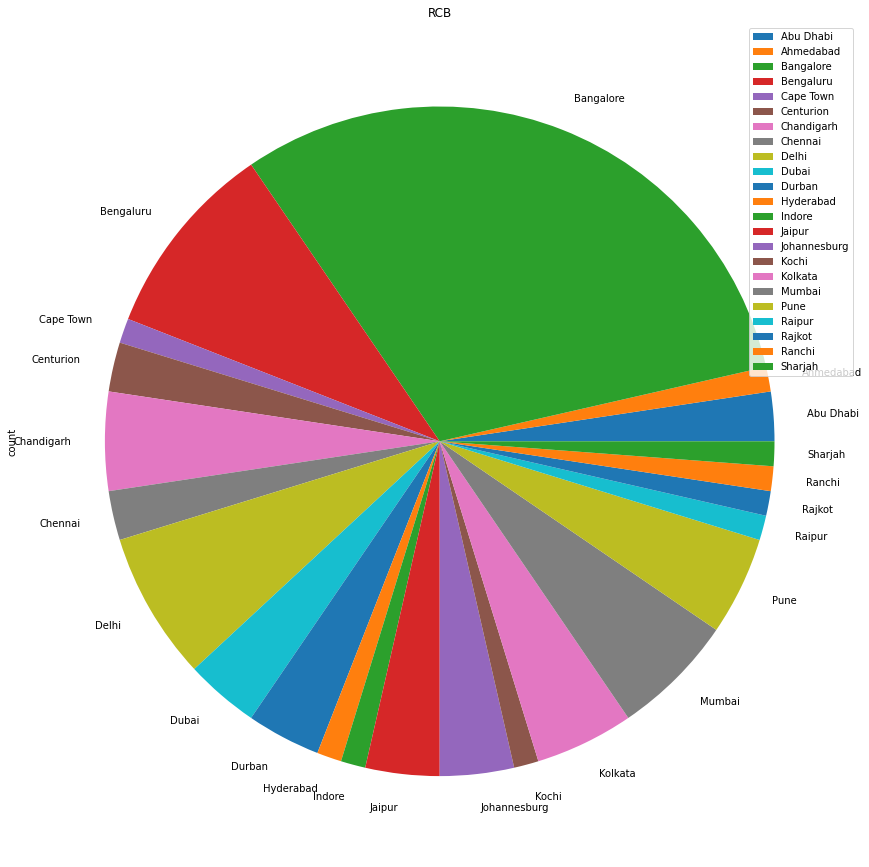

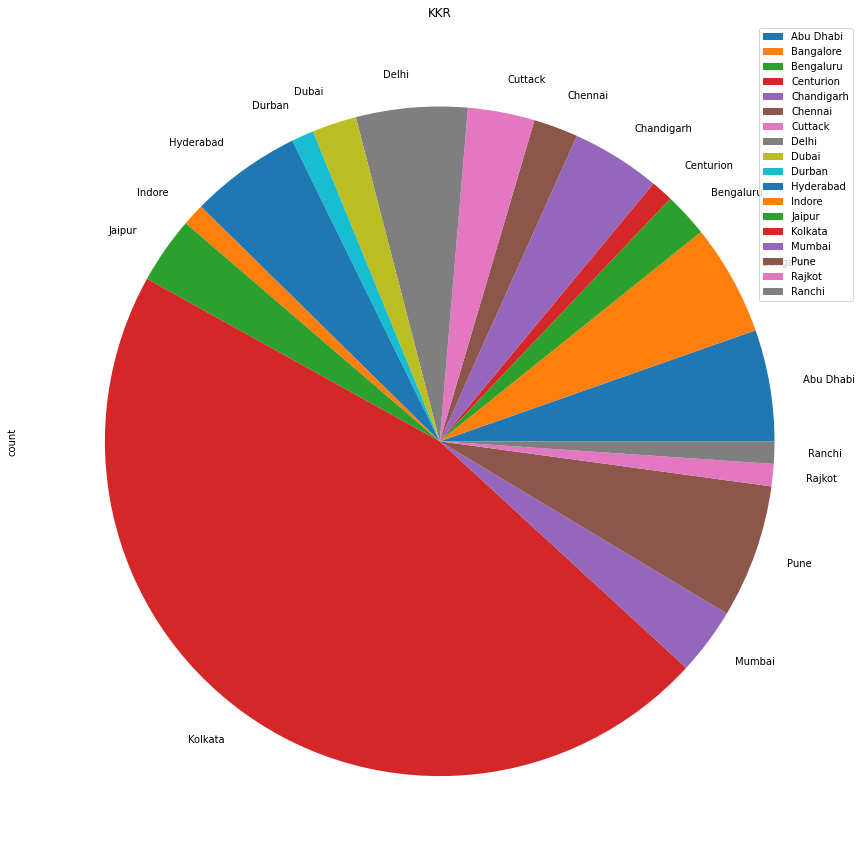

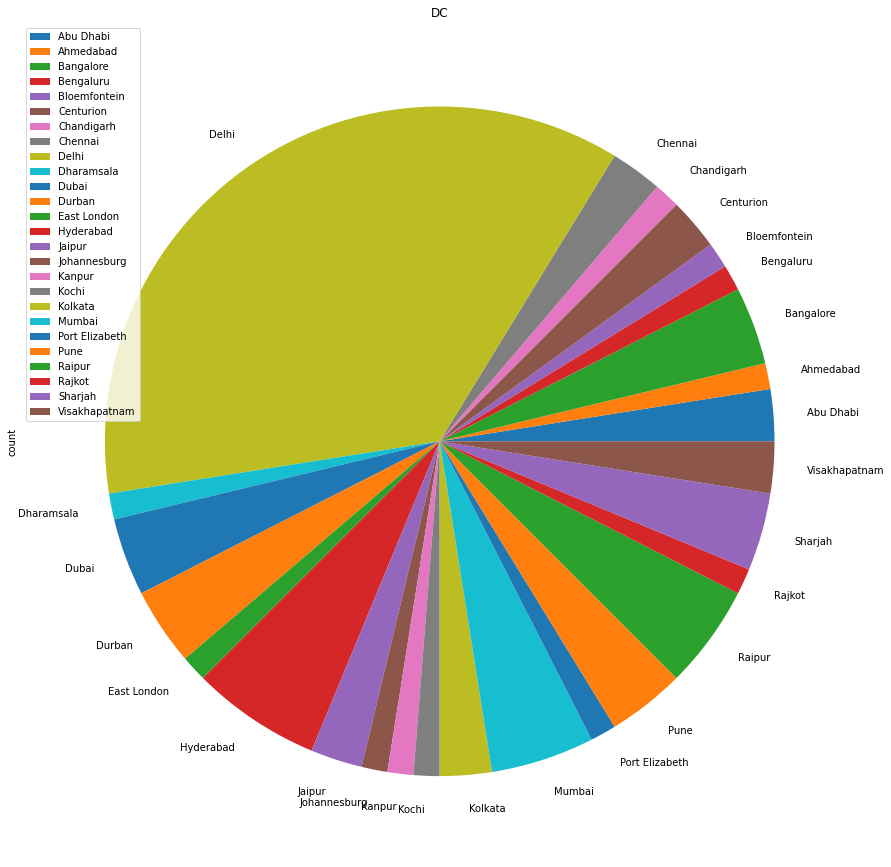

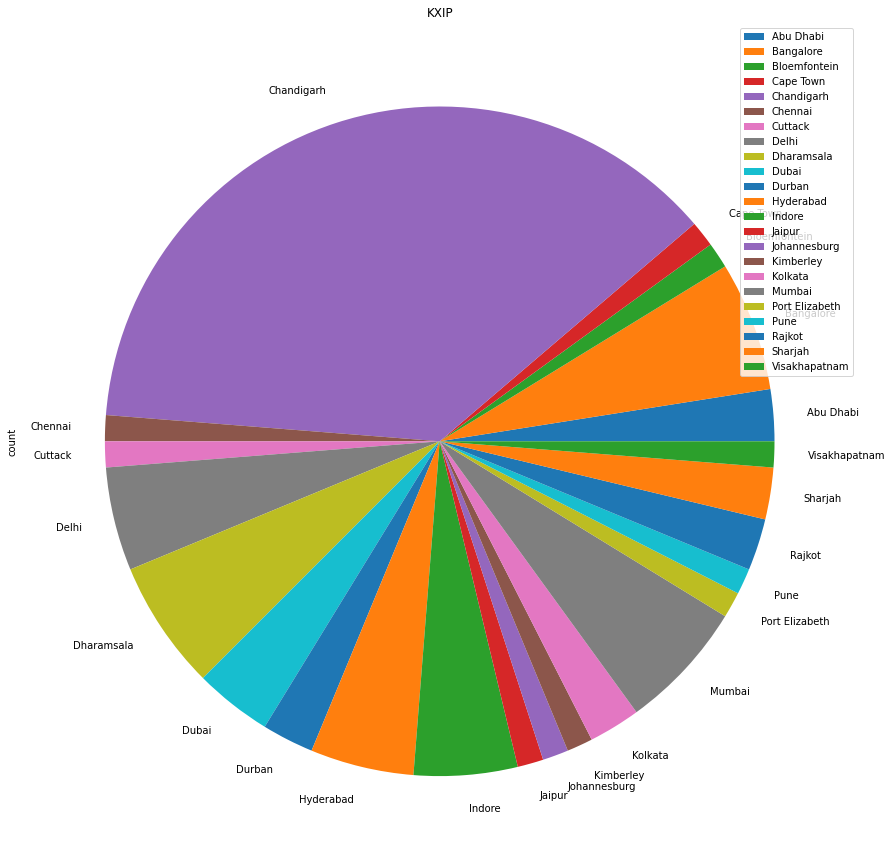

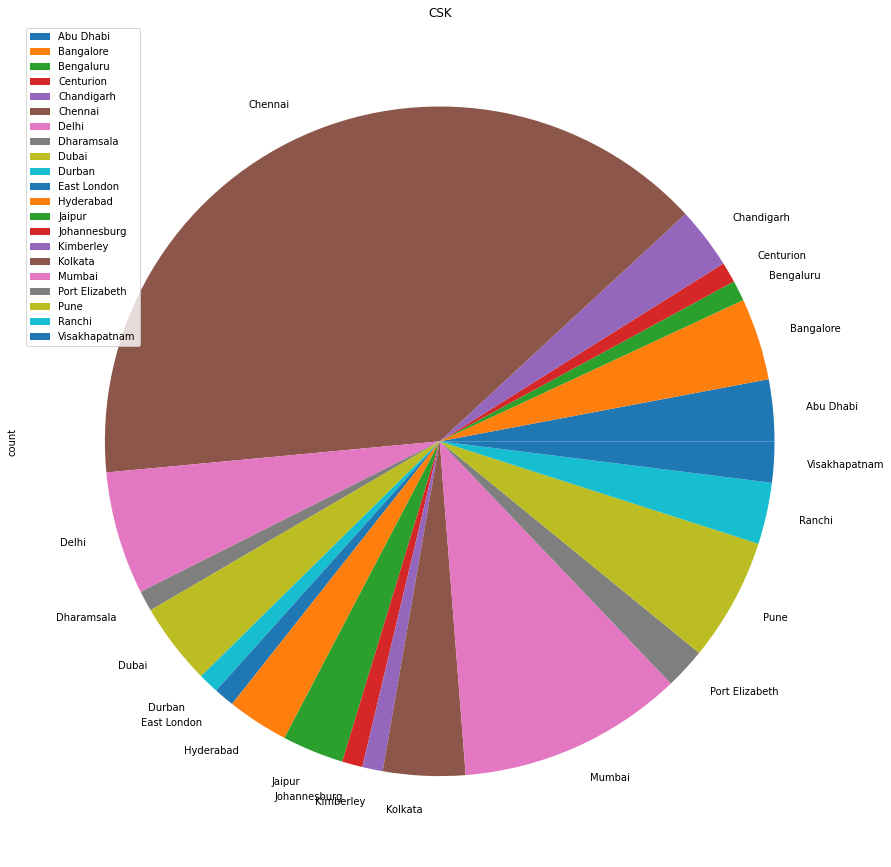

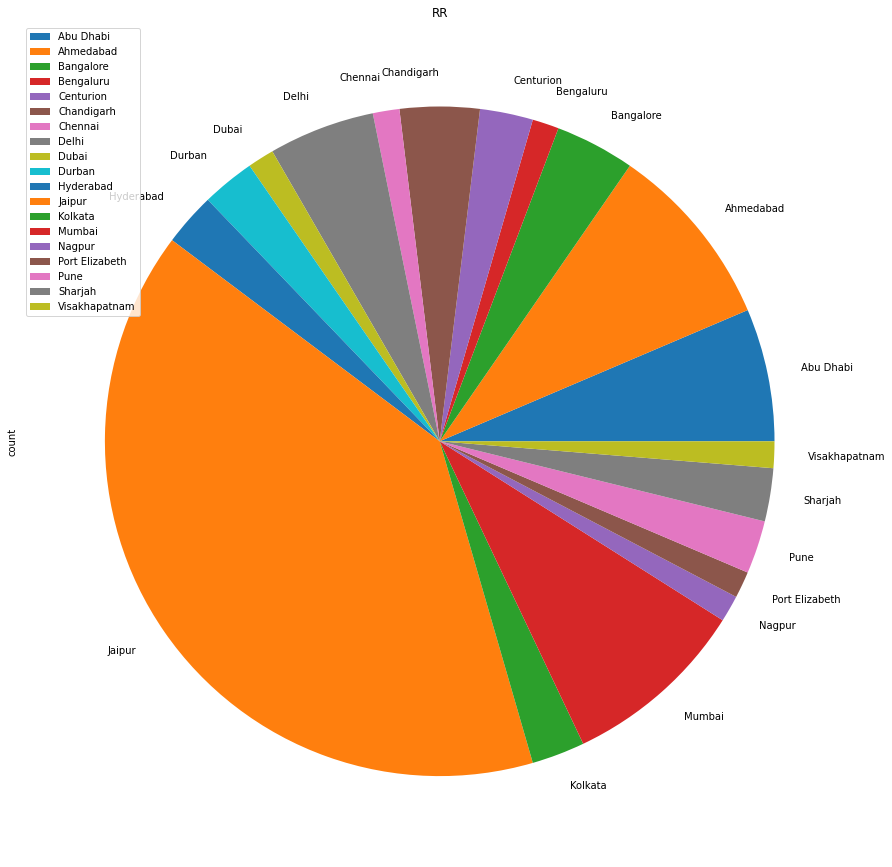

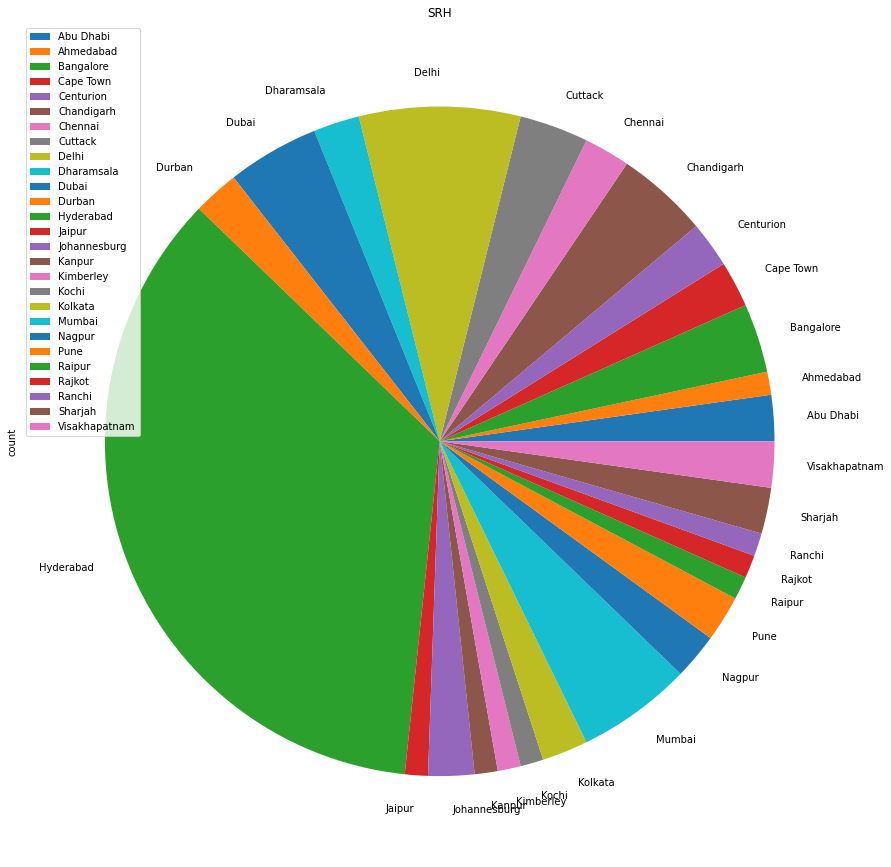

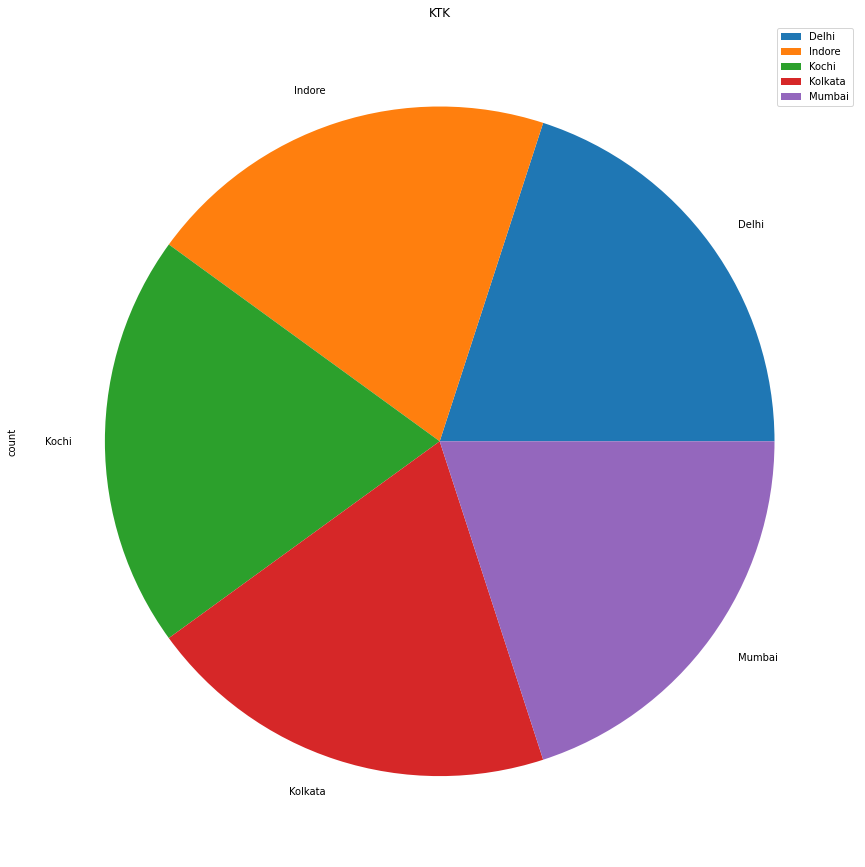

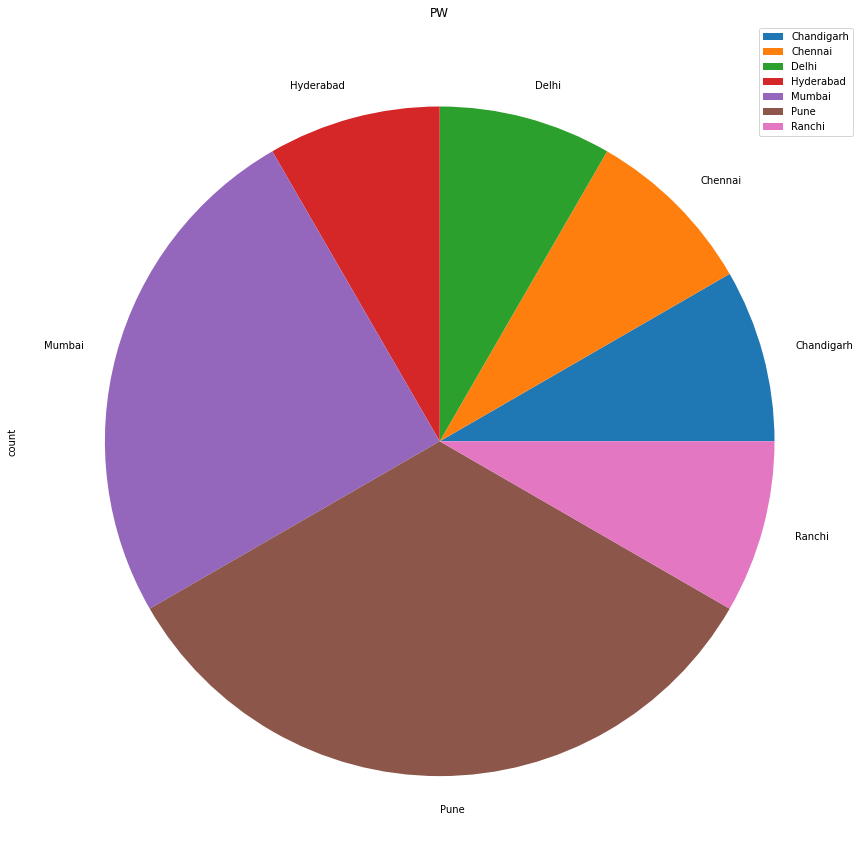

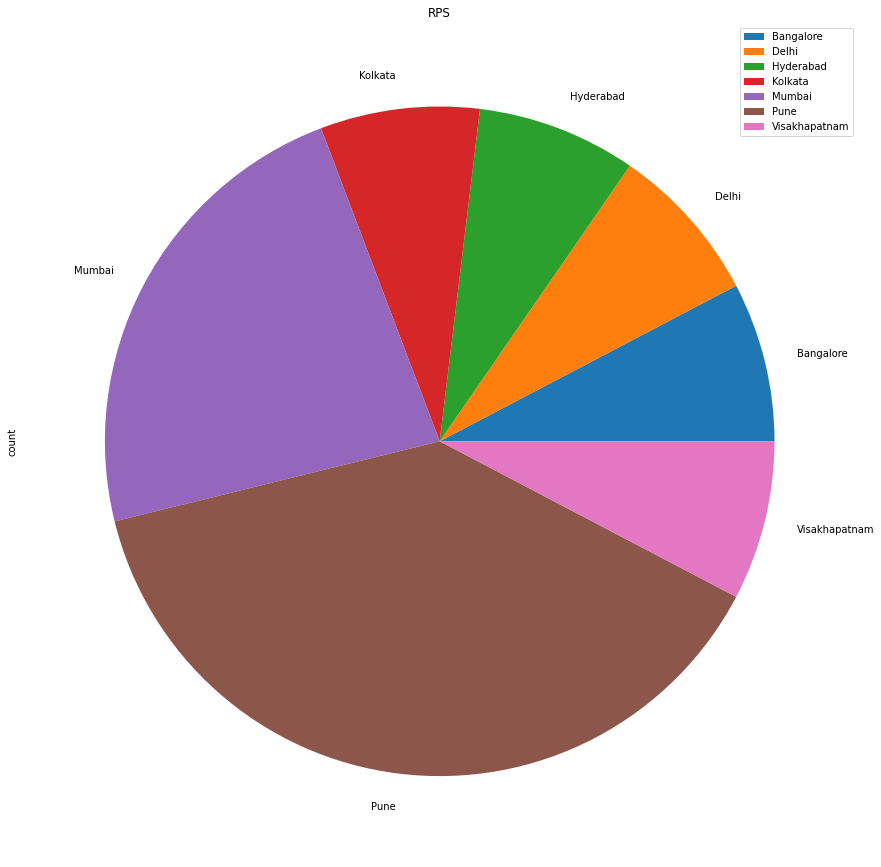

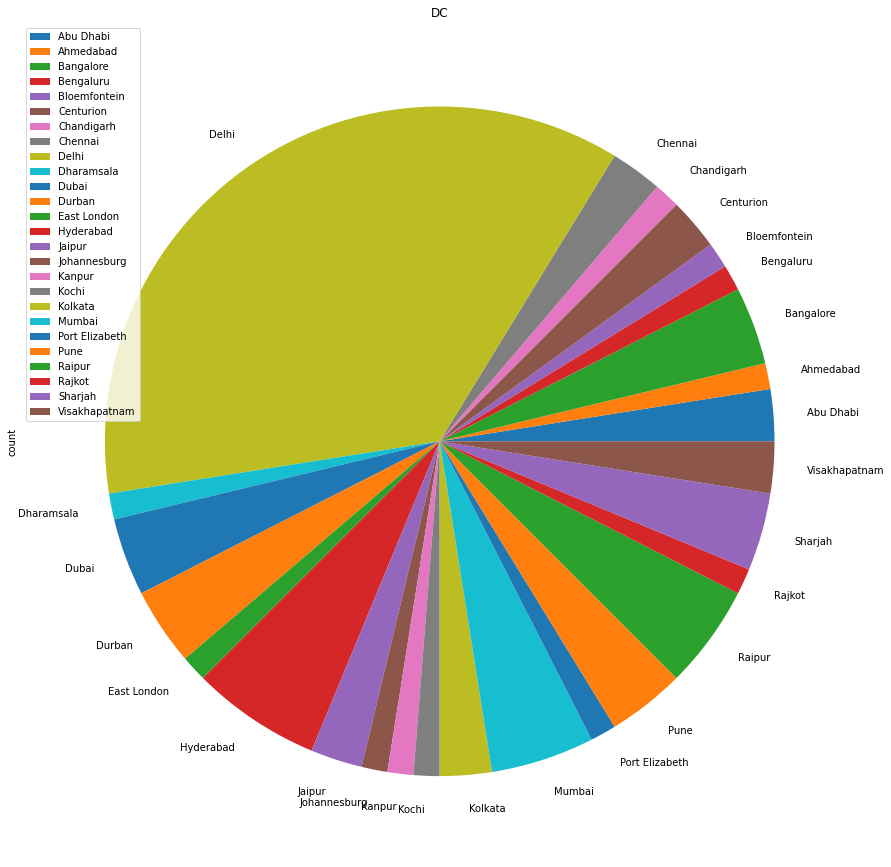

In [ ]:
# make pie chart for table above

for team in ChangedNames:
  team_city_data = city_data[city_data['winner'] == team]
  team_city_data = team_city_data.set_index(team_city_data.city)
  plot = team_city_data.plot.pie(y='count', figsize=(15, 20), title=team)